In [41]:
import pandas as pd
from prophet import Prophet

In [42]:
df = pd.read_csv("airplanes.csv")
df["Activity Period"] = pd.to_datetime(df["Activity Period"], format="%Y-%m-%d")
df = df.rename(columns={"Activity Period": "ds", "Passenger Count": "y"})

In [43]:
model = Prophet()
model.fit(df)

19:40:30 - cmdstanpy - INFO - Chain [1] start processing
19:40:30 - cmdstanpy - INFO - Chain [1] done processing


In [44]:
pred = model.predict(model.make_future_dataframe(365))

In [45]:
df2 = pred[["ds", "yhat"]]

In [46]:
df3 = df2[df2["ds"].dt.day == 1]

In [49]:
df3.tail(13).to_csv("predicted.csv")

In [50]:
from neuralprophet import NeuralProphet

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


In [51]:
m = NeuralProphet()
m.fit(df, freq="MS")

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.029]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 240


Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.


Finding best initial lr:   0%|          | 0/207 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - d:\Program Files\Python311\Lib\site-packages\pytorch_lightning\utilities\data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 16. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.

WARNING - (py.warnings._showwarnmsg) - d:\Program Files\Python311\Lib\site-packages\pytorch_lightning\utilities\data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 7. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.



Training: |          | 0/? [00:00<?, ?it/s]

train_loss  reg_loss          MAE         RMSE      Loss  RegLoss  epoch
0      0.510969       0.0  4745.576660  5521.308594  0.527643      0.0      0
1      0.479090       0.0  4392.695801  5118.094238  0.470840      0.0      1
2      0.448646       0.0  4137.551270  4843.531738  0.439658      0.0      2
3      0.420603       0.0  3978.754639  4690.906250  0.419205      0.0      3
4      0.389263       0.0  3841.257812  4564.961914  0.406382      0.0      4
..          ...       ...          ...          ...       ...      ...    ...
235    0.022789       0.0   535.837769   726.828613  0.022046      0.0    235
236    0.022783       0.0   562.385376   768.263550  0.026068      0.0    236
237    0.022784       0.0   562.607422   755.182800  0.025886      0.0    237
238    0.022775       0.0   526.845886   710.623596  0.021484      0.0    238
239    0.022783       0.0   533.115784   713.413940  0.022277      0.0    239

[240 rows x 7 columns]

In [54]:
df_future = m.make_future_dataframe(df, periods=12)
forecast = m.predict(df_future)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.029]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [56]:
forecast[["ds", "yhat1"]].to_csv("predicted.csv")

WARNING - (py.warnings._showwarnmsg) - C:\Users\Thunderobot\AppData\Local\Temp\ipykernel_14272\3661849851.py:11: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, date_parser=parser)

WARNING - (py.warnings._showwarnmsg) - C:\Users\Thunderobot\AppData\Local\Temp\ipykernel_14272\3661849851.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))



predicted=343.272180, expected=342.300000
predicted=293.329674, expected=339.700000
predicted=368.668956, expected=440.400000
predicted=335.044741, expected=315.900000
predicted=363.220222, expected=439.300000
predicted=357.645324, expected=401.300000
predicted=443.047835, expected=437.400000
predicted=378.365674, expected=575.500000
predicted=459.415021, expected=407.600000
predicted=526.890876, expected=682.000000
predicted=457.231274, expected=475.300000
predicted=672.914943, expected=581.300000
predicted=531.541449, expected=646.900000
Test RMSE: 89.021


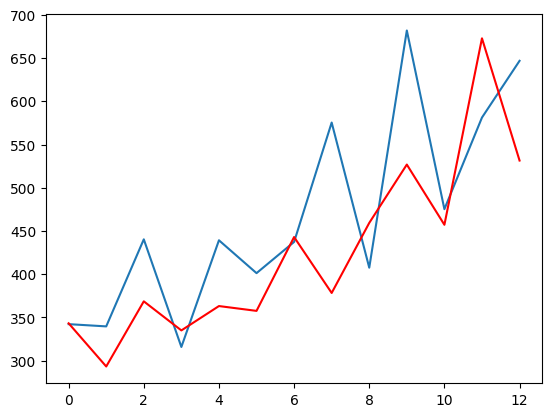

In [61]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, date_parser=parser)
series.index = series.index.to_period('M')
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()